In [3]:
import os
import json

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

from utils.exploratory import zip_dtype

In [4]:
plt.rcParams['figure.figsize'] = [24, 18]

### Correlações - Municípios

In [5]:
municipios = pd.DataFrame()
municipios_path = os.path.relpath('../data/municipios')

municipios_files = [x for x in os.walk(municipios_path)][0][2]
for file in municipios_files:
    if not 'municipios' in file:
        continue
    municipios = municipios.append(pd.read_csv(os.path.join(municipios_path, file), dtype=zip_dtype('../schemas/municipios_schema.json')))

In [6]:
municipios.head()

ano_censo   regiao unidade_federativa mesoregiao microregiao  \
0      2015  Sudeste          São Paulo      Assis       Assis   
1      2015  Sudeste          São Paulo      Assis       Assis   
2      2015  Sudeste          São Paulo      Assis       Assis   
3      2015  Sudeste          São Paulo      Assis       Assis   
4      2015  Sudeste          São Paulo      Assis       Assis   

               municipio cod_municipio  num_escolas  num_escolas_em_atividade  \
0                 Nantes       3532157          3.0                       3.0   
1                 Tarumã       3553955         10.0                      10.0   
2               Cruzália       3513306          5.0                       3.0   
3  Campos Novos Paulista       3509809          3.0                       3.0   
4                  Assis       3504008         75.0                      70.0   

   num_estudantes_ensino_infantil     ...      num_computador  \
0                           167.0     ...                 3.0   
1                           971.0     ...                10.0   
2                           103.0     ...                 3.0   
3                           202.0     ...                 3.0   
4                          5052.0     ...                68.0   

   num_comp_administrativo  num_comp_aluno  num_funcionarios  \
0                      3.0             1.0              89.0   
1                     10.0             8.0             458.0   
2                      3.0             1.0              54.0   
3                      3.0             3.0             133.0   
4                     66.0            53.0            3288.0   

   num_escolas_rurais  num_escolas_urbanas  num_professores  num_matriculas  \
0                 0.0                  0.0             44.0           782.0   
1                 0.0                  0.0            257.0          3880.0   
2                 0.0                  0.0             44.0           590.0   
3                 0.0                  0.0             77.0          1131.0   
4                 0.0                  0.0           1417.0         25237.0   

   num_estudantes  num_turmas  
0           676.0        45.0  
1          3473.0       181.0  
2           405.0        37.0  
3          1015.0        61.0  
4         22096.0      1134.0  

[5 rows x 51 columns]

In [7]:
corr = municipios.iloc[:, ((municipios.dtypes != 'string') & (municipios.dtypes != 'object')).values].corr()
corr = corr.fillna(0.0)
sns.clustermap(corr, vmin=-1, vmax=1, cmap='RdBu_r')
plt.title("Clustering hierárquico de variáveis dos municípios")

Text(0.5,1,'Clustering hierárquico de variáveis dos municípios')

### IDEB - Anos Iniciais

In [8]:
ideb_anos_iniciais = pd.read_csv('../data/ideb/ideb_municipios_anosiniciais2005_2017.csv',
                                 encoding='latin1',
                                 na_values=['-','ND'])
ideb_anos_iniciais['Cod_Municipio_Completo'] = ideb_anos_iniciais['Cod_Municipio_Completo'].astype('int')

D:\Programs\Anaconda3\envs\torch\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (62,63,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
ideb_anos_iniciais.head()

Co_UF  Cod_Municipio_Completo         Nome_Municipio       Rede  \
0    RO                 1100015  Alta Floresta D'Oeste   Estadual   
1    RO                 1100015  Alta Floresta D'Oeste  Municipal   
2    RO                 1100015  Alta Floresta D'Oeste    Pública   
3    RO                 1100023              Ariquemes   Estadual   
4    RO                 1100023              Ariquemes  Municipal   

   TaxaAprovacao2005_1ao5ano  TaxaAprovacao2005_1ano  TaxaAprovacao2005_2ano  \
0                       77.2                     NaN                    70.4   
1                        NaN                     NaN                     NaN   
2                       80.9                     NaN                    73.0   
3                       87.1                     NaN                    83.3   
4                       85.7                    93.0                    79.0   

   TaxaAprovacao2005_3ano  TaxaAprovacao2005_4ano  TaxaAprovacao2005_5ano  \
0                    78.2                    73.7                    82.5   
1                     NaN                     NaN                     NaN   
2                    81.5                    81.1                    87.9   
3                    88.6                    88.5                    87.5   
4                    87.3                    86.1                    87.4   

         ...         Ideb2015  Ideb2017  ProjecaoIdeb2007  ProjecaoIdeb2009  \
0        ...              5.8       6.2               3.6               3.9   
1        ...              5.0       5.1               NaN               NaN   
2        ...              5.8       6.2               3.8               4.1   
3        ...              5.6       6.0               4.1               4.4   
4        ...              5.0       5.4               3.6               3.9   

   ProjecaoIdeb2011  ProjecaoIdeb2013  ProjecaoIdeb2015  ProjecaoIdeb2017  \
0               4.3               4.6               4.9               5.2   
1               NaN               NaN               NaN               5.3   
2               4.5               4.8               5.1               5.4   
3               4.8               5.1               5.4               5.6   
4               4.3               4.6               4.9               5.2   

   ProjecaoIdeb2019  ProjecaoIdeb2021  
0               5.5               5.7  
1               5.5               5.8  
2               5.7               5.9  
3               5.9               6.2  
4               5.5               5.8  

[5 rows x 89 columns]

Text(0.5,1,'Clustering hierárquico de variáveis do IDEB')

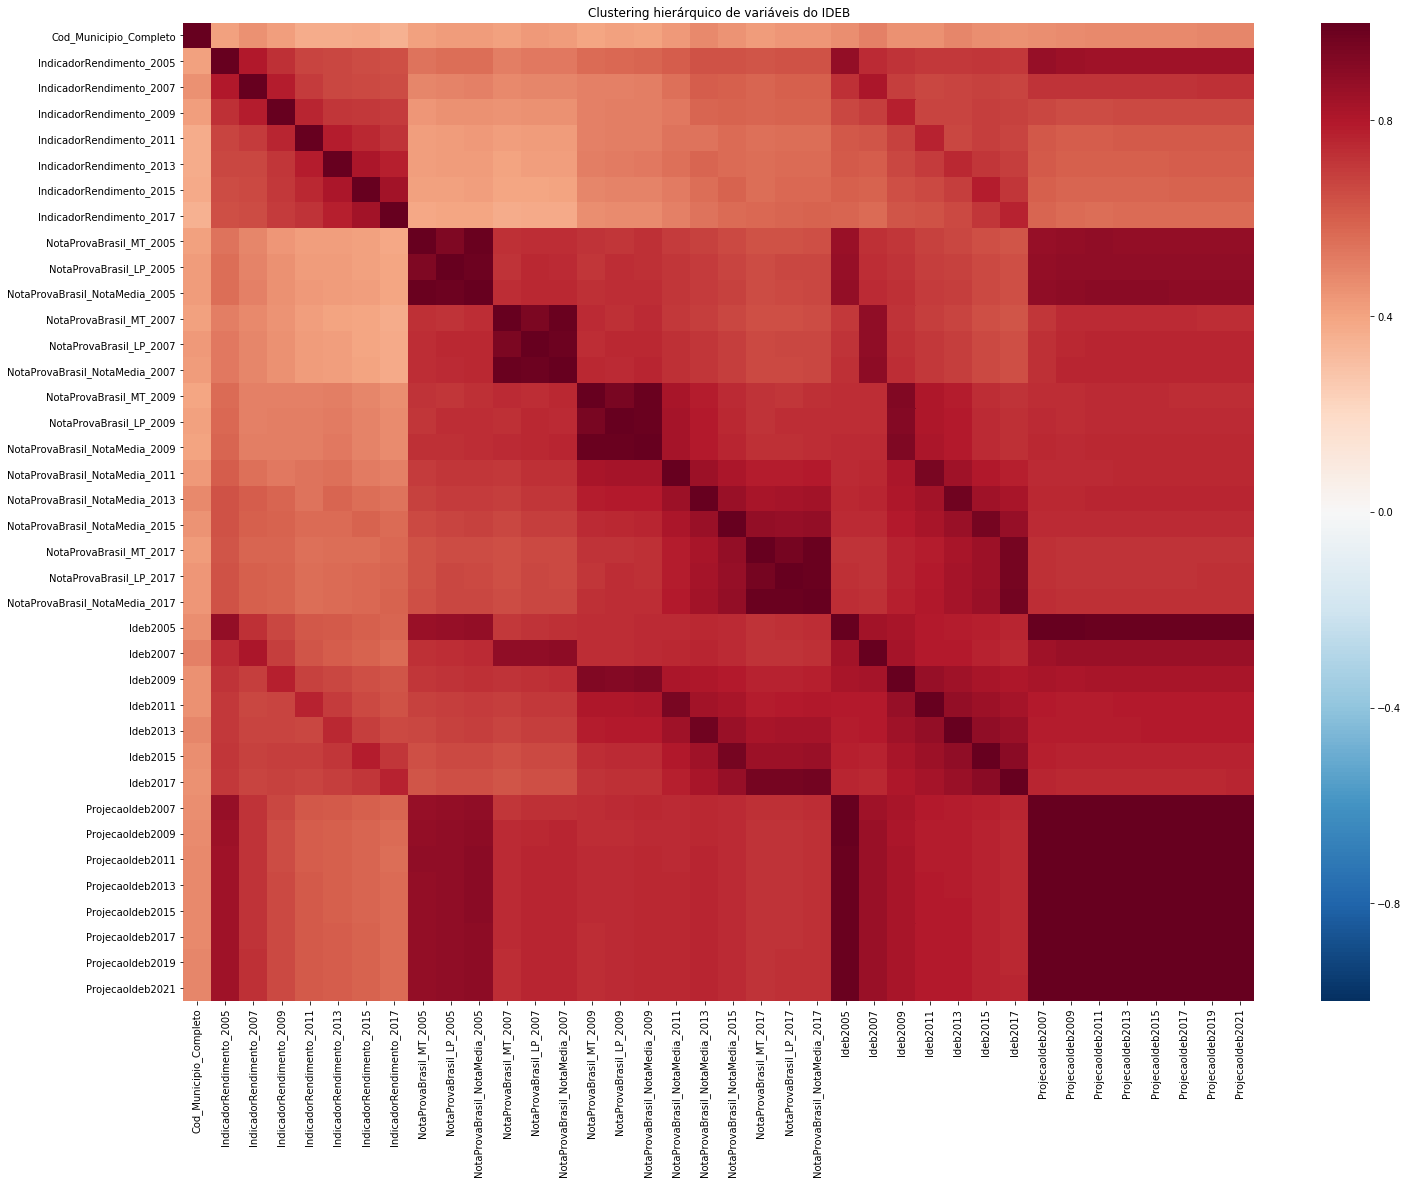

In [12]:
ideb_corr = ideb_anos_iniciais.corr().fillna(0.0)
non_approval_columns = [col for col in ideb_corr.columns if not col.startswith('Taxa')]
sns.heatmap(ideb_corr.loc[non_approval_columns, non_approval_columns], vmin=-1, vmax=1, cmap='RdBu_r')
plt.title("Clustering hierárquico de variáveis do IDEB")

### IDEB - Anos Finais

In [43]:
ideb_anos_finais = pd.read_csv('../data/ideb/ideb_municipios_anosfinais2005_2017.csv',
                                 encoding='latin1',
                                 na_values=['-','ND'])
ideb_anos_finais['Cod_Municipio_Completo'] = ideb_anos_finais['Cod_Municipio_Completo'].astype('int')

D:\Programs\Anaconda3\envs\torch\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (58,59,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
ideb_anos_finais.head()

Co_UF  Cod_Municipio_Completo         Nome_Municipio       Rede  \
0    RO                 1100015  Alta Floresta D'Oeste   Estadual   
1    RO                 1100015  Alta Floresta D'Oeste  Municipal   
2    RO                 1100015  Alta Floresta D'Oeste    Pública   
3    RO                 1100023              Ariquemes   Estadual   
4    RO                 1100023              Ariquemes  Municipal   

   TaxaAprovacao2005_6ao9ano  TaxaAprovacao2005_6ano  TaxaAprovacao2005_7ano  \
0                       75.9                    69.6                    75.9   
1                       77.6                    68.1                    74.3   
2                       76.7                    68.8                    75.0   
3                       79.2                    84.2                    79.9   
4                       77.6                    72.2                    76.9   

   TaxaAprovacao2005_8ano  TaxaAprovacao2005_9ano  IndicadorRendimento_2005  \
0                    83.2                    77.0                  0.761190   
1                    83.3                    89.0                  0.778453   
2                    83.2                    82.2                  0.768449   
3                    76.7                    75.7                  0.789890   
4                    81.1                    86.3                  0.787832   

         ...         Ideb2015  Ideb2017  ProjecaoIdeb2007  ProjecaoIdeb2009  \
0        ...              4.2       5.1               3.5               3.7   
1        ...              NaN       4.3               3.3               3.4   
2        ...              4.3       4.8               3.5               3.7   
3        ...              4.3       5.0               3.7               3.8   
4        ...              4.6       4.7               3.3               3.5   

   ProjecaoIdeb2011  ProjecaoIdeb2013  ProjecaoIdeb2015  ProjecaoIdeb2017  \
0               4.0               4.4               4.8               5.0   
1               3.7               4.1               4.5               4.7   
2               4.0               4.4               4.7               5.0   
3               4.1               4.5               4.9               5.1   
4               3.7               4.1               4.5               4.8   

   ProjecaoIdeb2019  ProjecaoIdeb2021  
0               5.3               5.5  
1               5.0               5.3  
2               5.3               5.5  
3               5.4               5.6  
4               5.0               5.3  

[5 rows x 82 columns]

In [45]:
ideb_corr = ideb_anos_finais.corr().fillna(0.0)
non_approval_columns = [col for col in ideb_corr.columns if not col.startswith('Taxa')]
sns.heatmap(ideb_corr.loc[non_approval_columns, non_approval_columns], vmin=-1, vmax=1, cmap='RdBu_r')
plt.title("Clustering hierárquico de variáveis do IDEB")

Text(0.5,1,'Clustering hierárquico de variáveis do IDEB')